In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import seaborn as sns
from scipy import stats
import scipy.stats as st
import scipy.stats as stats

# ETL

Importing files

In [2]:
measurements = pd.read_csv('measurements.csv')

In [3]:
measurements.shape

(388, 12)

In [4]:
measurements.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
measurements2 = pd.read_excel('measurements2.xlsx')

In [6]:
measurements2.shape


(388, 12)

In [7]:
measurements2.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [8]:
measurements.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [9]:
measurements2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [10]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [11]:
measurements2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


I will use measurements2 as main DB because the type for each column is more accureate to avoide doing more steps

In [12]:
data = measurements2

In [13]:
data.sample(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
375,11.9,3.7,33,25.0,19,NaN,SP98,0,0,0,NaN,NaN
369,15.4,4.5,42,22.0,30,NaN,SP98,0,0,0,NaN,NaN
356,17.0,4.2,48,22.0,16,NaN,SP98,0,0,0,NaN,NaN
146,20.8,4.5,45,21.5,10,NaN,E10,0,0,0,NaN,NaN
127,6.8,4.3,46,24.0,2,NaN,SP98,0,0,0,NaN,NaN


Validating null  values

In [14]:
data.isna().any()

distance         False
consume          False
speed            False
temp_inside       True
temp_outside     False
specials          True
gas_type         False
AC               False
rain             False
sun              False
refill liters     True
refill gas        True
dtype: bool

In [15]:
data['temp_inside'].isna().sum()

12

In [16]:
data['specials'].isna().sum()

295

In [17]:
data['refill liters'].isna().sum()

375

In [18]:
data['refill gas'].isna().sum()

375

Validating data in columns

In [19]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [20]:
data['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [21]:
data['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [22]:
data['temp_inside'].unique()

array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

In [23]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


# Data Cleaning

In [24]:
data.rename(columns = {'refill liters':'refill_liters'}, inplace = True)
data.rename(columns = {'refill gas':'refill_gas'}, inplace = True)

Filling the NAN for temp_inside with the mean

In [25]:
round(data['temp_inside'].mean(),1)

21.9

In [26]:
data['temp_inside'][data['temp_inside'].isna()] = round(data['temp_inside'].mean(),1)

C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_15748/3844876405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp_inside'][data['temp_inside'].isna()] = round(data['temp_inside'].mean(),1)


In [27]:
data['temp_inside'].isna().sum()

0

Droping the the columns with high null values. Special is already filled with AC rain and sun 

In [28]:
data = data.drop(['specials','refill_liters','refill_gas'],axis=1)
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [29]:
data.isna().any()

distance        False
consume         False
speed           False
temp_inside     False
temp_outside    False
gas_type        False
AC              False
rain            False
sun             False
dtype: bool

# EDA

Lets start analyzing the data we have:

C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 5.483256
Kurtosis: 36.923325


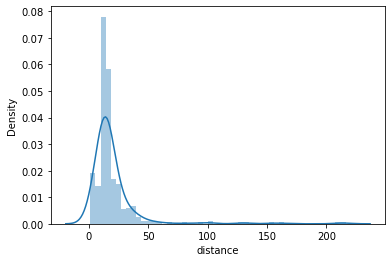

In [30]:
sns.distplot(data['distance'])
print("Skewness: %f" % data['distance'].skew())
print("Kurtosis: %f" % data['distance'].kurt())

C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.937552
Kurtosis: 14.491199


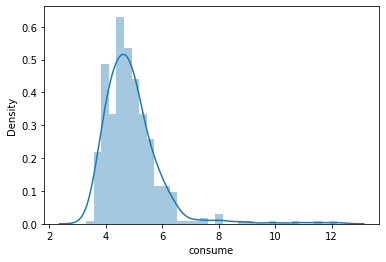

In [31]:
sns.distplot(data['consume'])
print("Skewness: %f" % data['consume'].skew())
print("Kurtosis: %f" % data['consume'].kurt())

Skewness: 0.753316
Kurtosis: 0.821514


C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


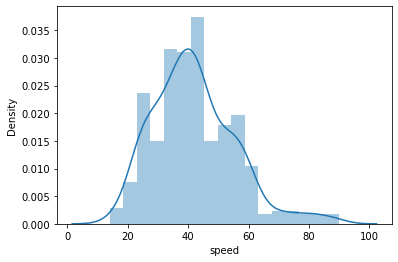

In [32]:
sns.distplot(data['speed'])
print("Skewness: %f" % data['speed'].skew())
print("Kurtosis: %f" % data['speed'].kurt())

Skewness: 1.008890
Kurtosis: 2.982978


C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


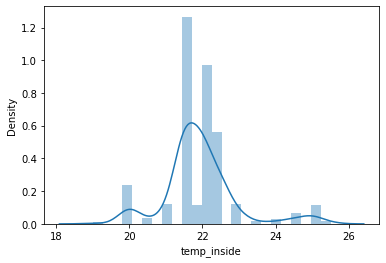

In [33]:
sns.distplot(data['temp_inside'])
print("Skewness: %f" % data['temp_inside'].skew())
print("Kurtosis: %f" % data['temp_inside'].kurt())

Skewness: 0.573224
Kurtosis: -0.019143


C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


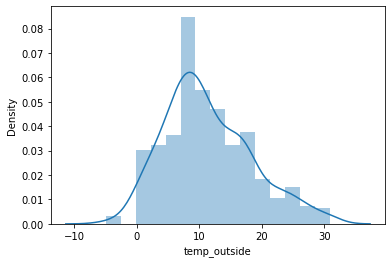

In [34]:
sns.distplot(data['temp_outside'])
print("Skewness: %f" % data['temp_outside'].skew())
print("Kurtosis: %f" % data['temp_outside'].kurt())

C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.177282
Kurtosis: 8.137037


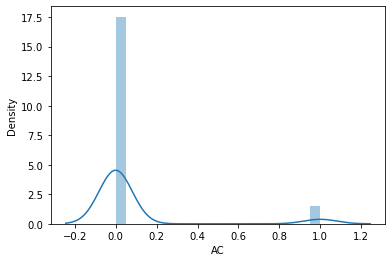

In [35]:
sns.distplot(data['AC'])
print("Skewness: %f" % data['AC'].skew())
print("Kurtosis: %f" % data['AC'].kurt())

Skewness: 2.294599
Kurtosis: 3.282076


C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


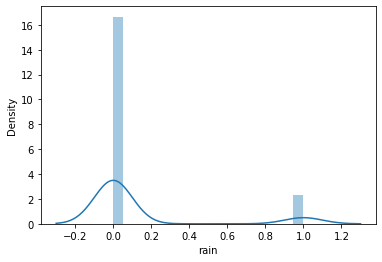

In [36]:
sns.distplot(data['rain'])
print("Skewness: %f" % data['rain'].skew())
print("Kurtosis: %f" % data['rain'].kurt())

C:\dataanalyst\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.047397
Kurtosis: 7.324358


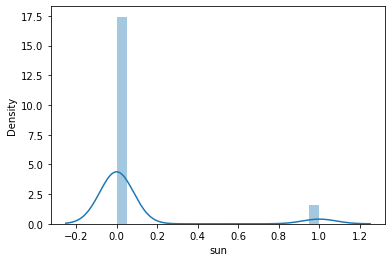

In [37]:
sns.distplot(data['sun'])
print("Skewness: %f" % data['sun'].skew())
print("Kurtosis: %f" % data['sun'].kurt())

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

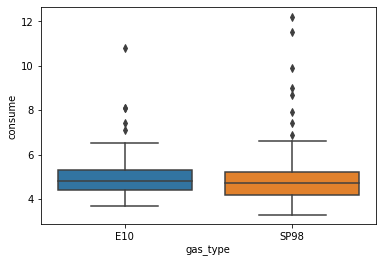

In [38]:
sns.boxplot(x='gas_type',y='consume',data=data)

<AxesSubplot:xlabel='gas_type', ylabel='distance'>

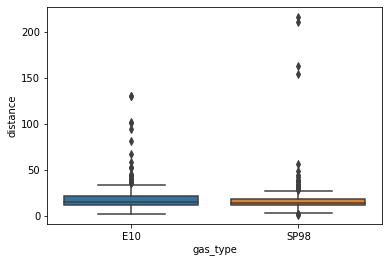

In [60]:
sns.boxplot(x='gas_type',y='distance',data=data)

Text(0.5, 1.0, 'Density and distribution of consume for each kind of gas type')

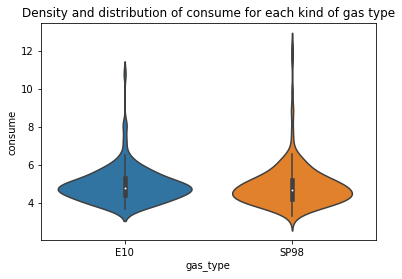

In [39]:
viz_2=sns.violinplot(data=data, x='gas_type', y='consume')
viz_2.set_title('Density and distribution of consume for each kind of gas type')

For the price sitribution we can see in a first view it it quite similar, some more outliers for tje SP98

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

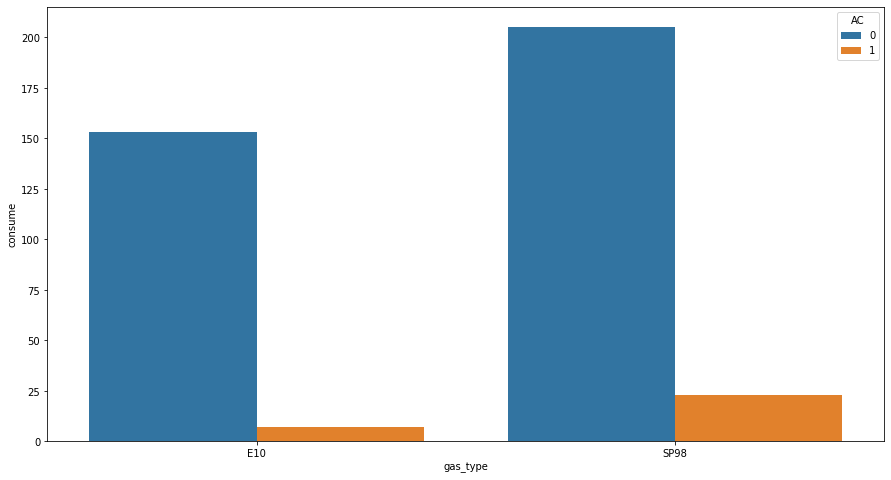

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x="gas_type",
           y="consume",
           hue="AC",
           data=data.groupby(['gas_type','AC'])['consume'].count().reset_index())

As we can analize the AC was used in less qty

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

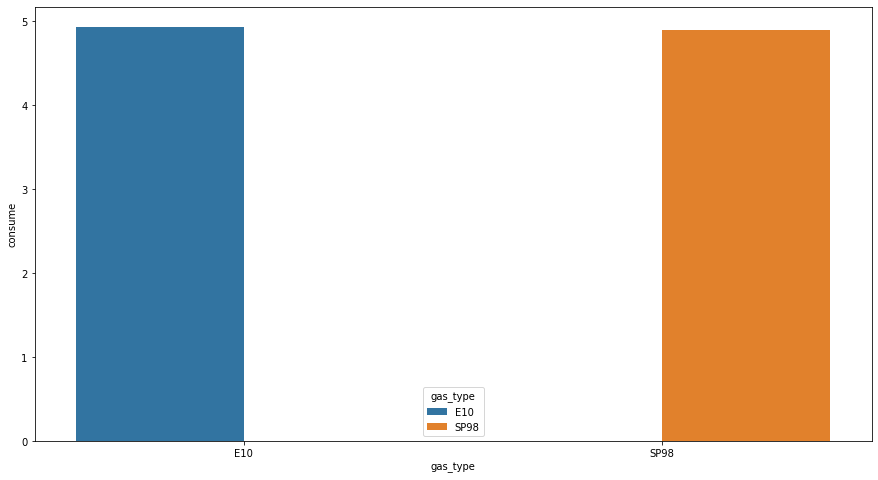

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x="gas_type",
           y="consume",
           hue="gas_type",
           data=
data.groupby('gas_type')[['consume', 'temp_outside']].agg('mean').reset_index())

In [41]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')

In [59]:

data.groupby('gas_type')[['consume', 'temp_outside','temp_inside','speed','distance']].agg('mean')


,consume,temp_outside,temp_inside,speed,distance
gas_type,,,,,
E10,4.931250,10.11875,21.916875,43.506250,21.096250
SP98,4.899123,12.22807,21.936842,40.820175,18.639912


In a quick analysis, we can se that the mean for E10 is higher for almos nothing, and it could be because, the speed and the distance are also higher affecting the consume. But it appears to have a similar behavior on consumption.

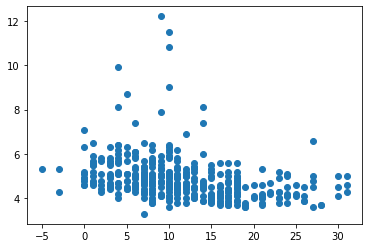

In [49]:
plt.scatter(data['temp_outside'],data['consume'])
plt.show()

In [ ]:
plt.scatter(data['temp_outside'],data['consume'])
plt.show()

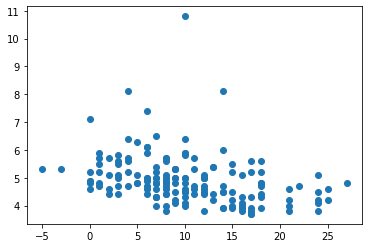

In [52]:
plt.scatter(data['temp_outside'][data['gas_type'] == 'E10'],data['consume'][data['gas_type'] == 'E10'])
plt.show()


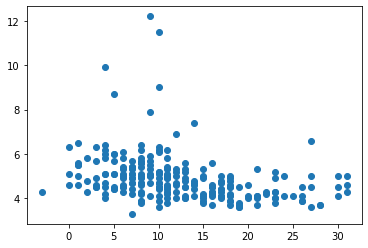

In [54]:
plt.scatter(data['temp_outside'][data['gas_type'] == 'SP98'],data['consume'][data['gas_type'] == 'SP98'])
plt.show()

In [ ]:
Lets analize the consumption by distanse 

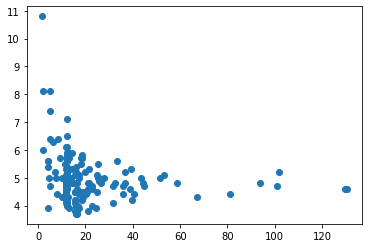

In [61]:
plt.scatter(data['distance'][data['gas_type'] == 'E10'],data['consume'][data['gas_type'] == 'E10'])
plt.show()

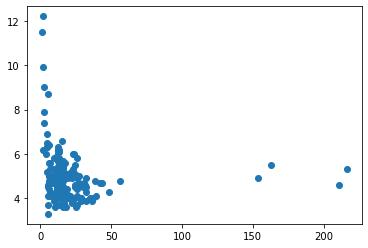

In [63]:
plt.scatter(data['distance'][data['gas_type'] == 'SP98'],data['consume'][data['gas_type'] == 'SP98'])
plt.show()

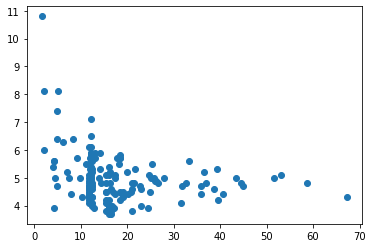

In [74]:
plt.scatter(data['distance'][(data['gas_type'] == 'E10') & (data['distance']< 80) ],data['consume'][(data['gas_type'] == 'E10') & (data['distance']< 80) ])
plt.show()

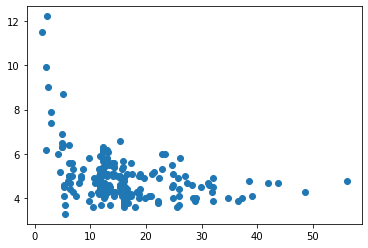

In [75]:
plt.scatter(data['distance'][(data['gas_type'] == 'SP98') & (data['distance']< 80) ],data['consume'][(data['gas_type'] == 'SP98') & (data['distance']< 80) ])
plt.show()

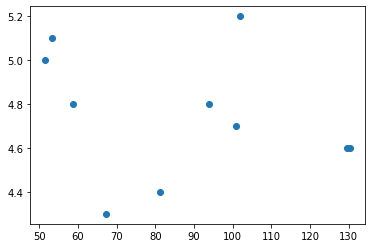

In [79]:
plt.scatter(data['distance'][(data['gas_type'] == 'E10') & (data['distance']> 50) ],data['consume'][(data['gas_type'] == 'E10') & (data['distance']>50) ])
plt.show()

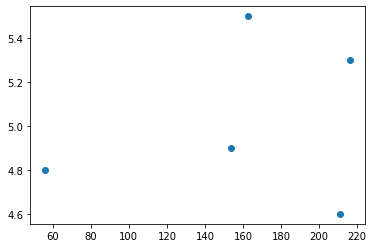

In [80]:
plt.scatter(data['distance'][(data['gas_type'] == 'SP98') & (data['distance']> 50) ],data['consume'][(data['gas_type'] == 'SP98') & (data['distance']>50) ])
plt.show()

It sees to be the same behavior for both types of gas regarding consumption by distance in les than 80Km,and for distance higher than 50km, we dont have a good amount of data but it appears to be very similar.

In [70]:
data[(data['gas_type'] == 'E10') & (data['distance']< 80) ]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
344,16.1,5.1,30,25.0,16,E10,1,1,0
345,16.0,4.0,42,22.0,15,E10,0,0,0
346,15.4,4.8,40,22.0,18,E10,0,0,0
347,17.2,3.9,35,22.0,16,E10,0,0,0


It seems to be a tendency, the higher the temp less consumption, mostly for E10 , the questions is how much affect it in reality. It appears to be no big difference.

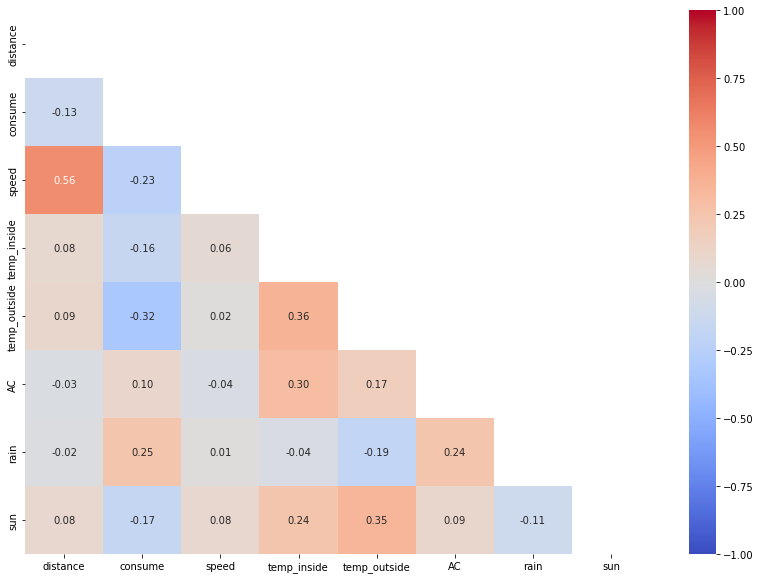

In [56]:
numerical1= data.select_dtypes('number').columns


matrix = np.triu(data[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (data[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [ ]:
With this analysis I dont see relevant difference between the two types of gas, lets try to validate it with Hypotesis testing

# Hypotesis testing

Hypotesis set
H0: The avg consume for E10 <= the avg consume for SP98................
H1: The avg consume for  E10 > the avg consume for SP98

In [90]:
E10 = data['consume'][data['gas_type'] == 'E10']
SP98 = data['consume'][data['gas_type'] == 'SP98']
display('E10',E10.count())
display('SP98',SP98.count())

'E10'

160

'SP98'

228

In [94]:
meanE10 = E10.mean()
stdE10 = E10.std()

meanSP98 = SP98.mean()


display(meanE10)
display(meanE10)

display(meanSP98)


stat = (meanE10 -meanSP98)/(meanE10/ np.sqrt(160))
stat

4.931250000000001

4.931250000000001

4.899122807017543

0.08240921036438772

In [106]:
p_value1 = st.ttest_1samp(E10,meanSP98,alternative="greater").pvalue
p_value1

0.32628234198441486

In [105]:
#Result
if p_value1 > 0.05:
    print("With the available data we dont have enoght evidence to reject the Null hypotesis H0")
elif p_value1 < 0.05:
    print('We reject the H0 hypotesis')

With the available data we dont have enoght evidence to reject the Null hypotesis H0


# CONCLUSION

In [ ]:
Based on the data we have, we canot asume there is a significat difference betwwen the consumtion on E10 and SP98